# DS 5500 Homework 2 Solutions

### importing required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt 
import hvplot.pandas
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels.formula.api as sm

### function to read csv file and get the information in a format useful for further analysis and visualization

In [2]:
def read_csv(csv_file_path1, investigating_column_name1, new_investigating_column_name1,
            csv_file_path2, investigating_column_name2, new_investigating_column_name2):
    
    #reading first data file
    csv_data1 = pd.read_csv(csv_file_path1)
    #removing any row that has a missing value(information)
    csv_data1 = csv_data1.dropna(how = 'any', 
                               axis = 0)
    csv_data1 = csv_data1.rename(columns = {'geo' : 'country_abv', 
                                          'time' : 'year', 
                                          investigating_column_name1 : new_investigating_column_name1})
    
    #reading second data file
    csv_data2 = pd.read_csv(csv_file_path2)
    #removing any row that has a missing value(information)
    csv_data2 = csv_data2.dropna(how = 'any', 
                               axis = 0)
    csv_data2 = csv_data2.rename(columns = {'geo' : 'country_abv',
                                            'time' : 'year', 
                                            investigating_column_name2 : new_investigating_column_name2})
    
    #combining both the datasets 
    csv_data = pd.merge(csv_data1, csv_data2, 
                                how = 'outer', 
                                on = ['country_abv', 'year'], 
                                validate = 'one_to_one').dropna(how = 'any', 
                                                                axis = 0)
    return csv_data

## Problem 4

#### obtaining the dataframe containing income and life expectancy information for each country and each year

In [3]:
#obtaining the GDP per capita and life expectancy data over time
gdp_per_capita_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_gdppercapita_us_inflation_adjusted_by_geo_time.csv'
life_expectancy_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_life_expectancy_years_by_geo_time.csv'

gdp_le_data = read_csv(gdp_per_capita_data_file_path,
                'gdppercapita_us_inflation_adjusted', 
                'gdp_per_capita',
                life_expectancy_data_file_path,
                'life_expectancy_years',
                'life_expectancy')

In [4]:
gdp_le_data['log_gdp_per_capita'] = np.log(gdp_le_data['gdp_per_capita'])

In [5]:
gdp_le_data[:5]

,country_abv,year,gdp_per_capita,life_expectancy,log_gdp_per_capita
0,abw,2010,24271.94042,75.06,10.097076
1,afg,2002,364.57057,52.43,5.898720
2,afg,2003,376.75871,53.03,5.931605
3,afg,2004,364.09544,53.50,5.897416
4,afg,2005,389.41636,53.87,5.964649


#### splitting data into train and test set

In [6]:
gdp_le_data_train, gdp_le_data_test = train_test_split(gdp_le_data, test_size=0.2)

### baseline model (Y = life expectancy, X1 = income, X2 = Year)

#### checking for linearity between Y and X1, X2 using scatterplots

<Figure size 432x288 with 0 Axes>

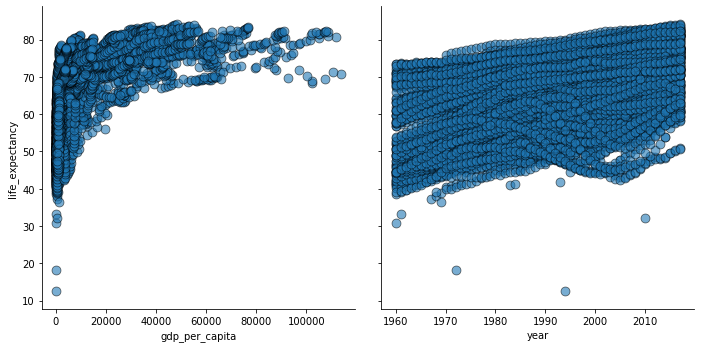

In [7]:
plt.figure()
sns.pairplot(gdp_le_data, x_vars=['gdp_per_capita','year'], 
             y_vars='life_expectancy', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q4_baseline_pair_plot.png")

#### fitting the regression model

In [8]:
q4_baseline_model = sm.ols(formula="life_expectancy ~ gdp_per_capita + year",
                           data = gdp_le_data_train).fit()

#### getting model stats

In [9]:
q4_baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2739.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:57:31   Log-Likelihood:                -23811.
No. Observations:                6967   AIC:                         4.763e+04
Df Residuals:                    6964   BIC:                         4.765e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -361.9312     11.198    -32.322      0.000    -383.882    -339.980
gdp_per_capita     0.0003   5.73e-06     56.896      0.000       0.000       0.000
year               0.2132      0.006     37.912      0.000       0.202       0.224
==============================================================================
Omnibus:                      482.203   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.881
Skew:                          -0.706   Prob(JB):                    9.88e-128
Kurtosis:                       2.851   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### final model (Y = life expectancy, X1 = log(income), X2 = Year)

#### checking for linearity between Y and X1, X2 using scatterplots

<Figure size 432x288 with 0 Axes>

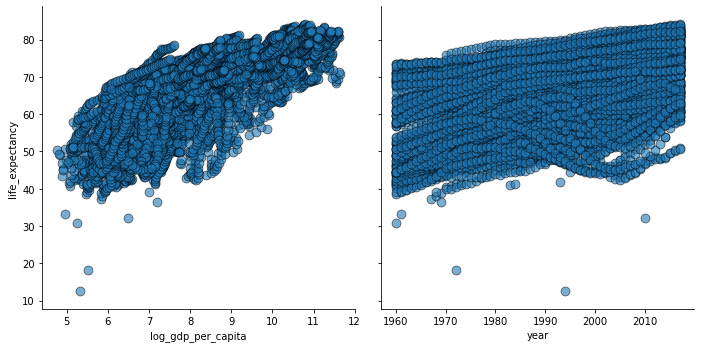

In [10]:
plt.figure()
sns.pairplot(gdp_le_data, x_vars=['log_gdp_per_capita', 'year'], 
             y_vars='life_expectancy', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q4_pair_plot.png")

#### fitting the regression model

In [11]:
q4_model = sm.ols(formula="life_expectancy ~ log_gdp_per_capita + year",
                           data = gdp_le_data_train).fit()

#### getting model stats

In [12]:
q4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     8252.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:57:32   Log-Likelihood:                -21600.
No. Observations:                6967   AIC:                         4.321e+04
Df Residuals:                    6964   BIC:                         4.323e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -350.4873      8.119    -43.171      0.000    -366.402    -334.572
log_gdp_per_capita     4.7591      0.043    110.803      0.000       4.675       4.843
year                   0.1896      0.004     46.240      0.000       0.182       0.198
==============================================================================
Omnibus:                      723.915   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1232.411
Skew:                          -0.728   Prob(JB):                    2.43e-268
Kurtosis:                       4.458   Cond. No.                     2.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### getting model params

In [13]:
q4_model.params

Intercept            -350.487298
log_gdp_per_capita      4.759105
year                    0.189558
dtype: float64

In [14]:
q4_model_pred = q4_model.predict(gdp_le_data_test)
q4_model_residuals = q4_model.resid

## Problem 5

#### obtaining the dataframe containing income and child mortality information for each country and each year

In [15]:
#obtaining the GDP per capita and life expectancy data over time
gdp_per_capita_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_gdppercapita_us_inflation_adjusted_by_geo_time.csv'
child_mortality_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_child_mortality_0_5_year_olds_dying_per_1000_born_by_geo_time.csv'

gdp_cm_data = read_csv(gdp_per_capita_data_file_path,
                       'gdppercapita_us_inflation_adjusted',
                       'gdp_per_capita',
                       child_mortality_data_file_path,
                       'child_mortality_0_5_year_olds_dying_per_1000_born',
                       'child_mortality_rate')

In [16]:
gdp_cm_data['log_gdp_per_capita'] = np.log(gdp_cm_data['gdp_per_capita'])
gdp_cm_data['log_child_mortality_rate'] = np.log(gdp_cm_data['child_mortality_rate'] )

In [17]:
gdp_cm_data[:5]

,country_abv,year,gdp_per_capita,child_mortality_rate,log_gdp_per_capita,log_child_mortality_rate
0,abw,2010,24271.94042,17.969,10.097076,2.888648
1,afg,2002,364.57057,122.200,5.898720,4.805659
2,afg,2003,376.75871,118.300,5.931605,4.773224
3,afg,2004,364.09544,114.400,5.897416,4.739701
4,afg,2005,389.41636,110.300,5.964649,4.703204


#### splitting the data into train and test set

In [18]:
gdp_cm_data_train, gdp_cm_data_test = train_test_split(gdp_cm_data, test_size=0.2)

### baseline model (Y = child mortality rate, X1 = income ( GDP per capita ), X2 = Year)

#### checking for linearity

<Figure size 432x288 with 0 Axes>

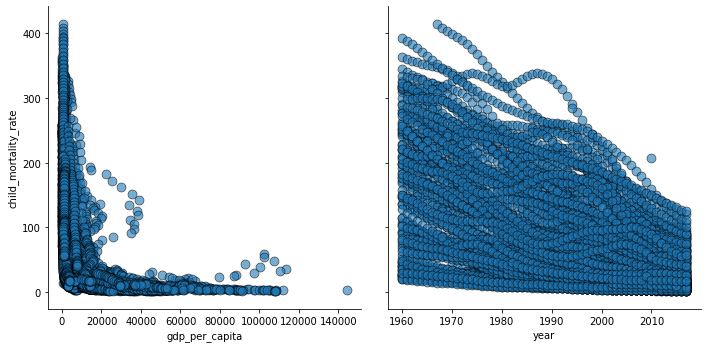

In [19]:
plt.figure()
sns.pairplot(gdp_cm_data, x_vars=['gdp_per_capita', 'year'], 
             y_vars='child_mortality_rate', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q5_baseline_pair_plot.png")

#### fitting the regression model

In [20]:
q5_baseline_model = sm.ols(formula="child_mortality_rate ~ gdp_per_capita + year",
                           data = gdp_cm_data_train).fit()

#### getting the model stats

In [21]:
q5_baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     child_mortality_rate   R-squared:                       0.378
Model:                              OLS   Adj. R-squared:                  0.378
Method:                   Least Squares   F-statistic:                     2111.
Date:                  Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                          01:57:33   Log-Likelihood:                -38480.
No. Observations:                  6952   AIC:                         7.697e+04
Df Residuals:                      6949   BIC:                         7.699e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4113.6034     93.402     44.042      0.000    3930.507    4296.700
gdp_per_capita    -0.0020   4.83e-05    -40.937      0.000      -0.002      -0.002
year              -2.0167      0.047    -42.985      0.000      -2.109      -1.925
==============================================================================
Omnibus:                      935.649   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1382.113
Skew:                           0.995   Prob(JB):                    7.55e-301
Kurtosis:                       3.902   Cond. No.                     2.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### final model (Y = log(child mortality rate), X1 = log(income ( GDP per capita )), X2 = Year)

#### checking for linearity

<Figure size 432x288 with 0 Axes>

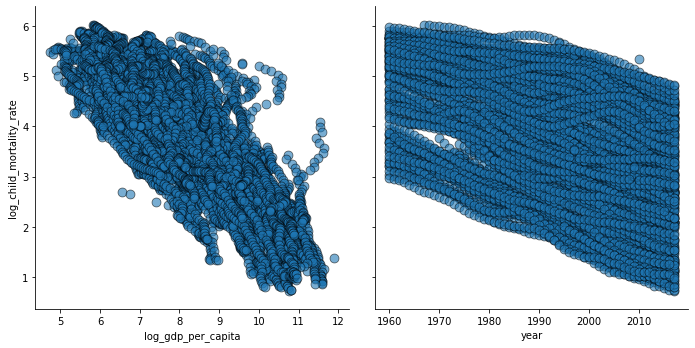

In [22]:
plt.figure()
sns.pairplot(gdp_cm_data, x_vars=['log_gdp_per_capita', 'year'], 
             y_vars='log_child_mortality_rate', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q5_pair_plot.png")

#### fitting the regression model

In [23]:
q5_model = sm.ols(formula="log_child_mortality_rate ~ log_gdp_per_capita + year",
                           data = gdp_cm_data_train).fit()

#### getting model stats

In [24]:
q5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     log_child_mortality_rate   R-squared:                       0.808
Model:                                  OLS   Adj. R-squared:                  0.807
Method:                       Least Squares   F-statistic:                 1.458e+04
Date:                      Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                              01:57:33   Log-Likelihood:                -5537.6
No. Observations:                      6952   AIC:                         1.108e+04
Df Residuals:                          6949   BIC:                         1.110e+04
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             61.0246      0.814     74.971      0.000      59.429      62.620
log_gdp_per_capita    -0.6263      0.004   -144.870      0.000      -0.635      -0.618
year                  -0.0262      0.000    -63.694      0.000      -0.027      -0.025
==============================================================================
Omnibus:                      381.080   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.719
Skew:                           0.472   Prob(JB):                    2.91e-127
Kurtosis:                       4.059   Cond. No.                     2.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#### getting model parameters

In [26]:
q5_model.params

Intercept             61.024567
log_gdp_per_capita    -0.626314
year                  -0.026193
dtype: float64